In [1]:
from datetime import datetime, timedelta
from nsepy import get_history
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
start_train = datetime(2010,1,1)
end_train = datetime(2020,2,1)
nifty_raw = np.array(get_history('NIFTY',start_train,end_train,index=True)['Close'])
nifty_range = 1000 #np.max(nifty_raw) - np.min(nifty_raw)
nifty_train = nifty_raw/nifty_range
time_array = np.arange(0,len(nifty_train),1)

In [3]:
window_size = 20
batch_size = 16
shuffle_buffer_size = len(nifty_train)

In [4]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [5]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1][np.newaxis]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [6]:
nifty_train
#for x,y in dataset:
#    print("x : ",x.numpy())
#    print("y : ",y.numpy())

array([ 5.2322 ,  5.2779 ,  5.2818 , ..., 12.0358 , 11.9621 , 11.66185])

In [7]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

dataset = windowed_dataset(nifty_train, window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(20),
  tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(lr=5e-5, momentum=0.98)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset,epochs=400)

Epoch 1/400
156/156 [==============================] - 6s 41ms/step - loss: 3.8181 - mae: 4.3128
Epoch 2/400
156/156 [==============================] - 3s 21ms/step - loss: 1.4631 - mae: 1.9217
Epoch 3/400
156/156 [==============================] - 3s 20ms/step - loss: 1.4256 - mae: 1.8762
Epoch 4/400
156/156 [==============================] - 3s 21ms/step - loss: 1.3499 - mae: 1.8109
Epoch 5/400
156/156 [==============================] - 3s 21ms/step - loss: 1.0475 - mae: 1.4832
Epoch 6/400
156/156 [==============================] - 3s 21ms/step - loss: 0.3465 - mae: 0.6041
Epoch 7/400
156/156 [==============================] - 3s 20ms/step - loss: 0.0952 - mae: 0.3183
Epoch 8/400
156/156 [==============================] - 3s 20ms/step - loss: 0.0379 - mae: 0.1869
Epoch 9/400
156/156 [==============================] - 3s 21ms/step - loss: 0.0196 - mae: 0.1251
Epoch 10/400
156/156 [==============================] - 3s 21ms/step - loss: 0.0124 - mae: 0.0993: 1s - loss:
Epoch 11/400
156/

156/156 [==============================] - 3s 22ms/step - loss: 0.0034 - mae: 0.0614: 2s - loss: 0.0 - ETA: 0s - loss: 0.0035
Epoch 83/400
156/156 [==============================] - 3s 22ms/step - loss: 0.0033 - mae: 0.0603
Epoch 84/400
156/156 [==============================] - 3s 21ms/step - loss: 0.0035 - mae: 0.0627
Epoch 85/400
156/156 [==============================] - 3s 20ms/step - loss: 0.0032 - mae: 0.0598
Epoch 86/400
156/156 [==============================] - 4s 23ms/step - loss: 0.0035 - mae: 0.0634
Epoch 87/400
156/156 [==============================] - 4s 24ms/step - loss: 0.0033 - mae: 0.0606
Epoch 88/400
156/156 [==============================] - 3s 22ms/step - loss: 0.0031 - mae: 0.0585
Epoch 89/400
156/156 [==============================] - 3s 21ms/step - loss: 0.0032 - mae: 0.0599
Epoch 90/400
156/156 [==============================] - 3s 20ms/step - loss: 0.0031 - mae: 0.0582: 1s - loss: 0.
Epoch 91/400
156/156 [==============================] - 3s 21ms/step - loss

156/156 [==============================] - 3s 19ms/step - loss: 0.0030 - mae: 0.0582
Epoch 164/400
156/156 [==============================] - 4s 24ms/step - loss: 0.0030 - mae: 0.0574
Epoch 165/400
156/156 [==============================] - 4s 23ms/step - loss: 0.0031 - mae: 0.0585
Epoch 166/400
156/156 [==============================] - 3s 22ms/step - loss: 0.0030 - mae: 0.0578
Epoch 167/400
156/156 [==============================] - 3s 21ms/step - loss: 0.0030 - mae: 0.0580
Epoch 168/400
156/156 [==============================] - 3s 21ms/step - loss: 0.0032 - mae: 0.0603
Epoch 169/400
156/156 [==============================] - 4s 26ms/step - loss: 0.0030 - mae: 0.0585
Epoch 170/400
156/156 [==============================] - 3s 22ms/step - loss: 0.0029 - mae: 0.0570
Epoch 171/400
156/156 [==============================] - 3s 21ms/step - loss: 0.0030 - mae: 0.0577
Epoch 172/400
156/156 [==============================] - 3s 22ms/step - loss: 0.0031 - mae: 0.0591
Epoch 173/400
156/156 [=

156/156 [==============================] - 3s 22ms/step - loss: 0.0029 - mae: 0.0570
Epoch 243/400
156/156 [==============================] - 4s 23ms/step - loss: 0.0032 - mae: 0.0612
Epoch 244/400
156/156 [==============================] - 4s 23ms/step - loss: 0.0031 - mae: 0.0593
Epoch 245/400
156/156 [==============================] - 4s 23ms/step - loss: 0.0029 - mae: 0.0573
Epoch 246/400
156/156 [==============================] - 3s 21ms/step - loss: 0.0030 - mae: 0.0573
Epoch 247/400
156/156 [==============================] - 3s 21ms/step - loss: 0.0029 - mae: 0.0572
Epoch 248/400
156/156 [==============================] - 3s 21ms/step - loss: 0.0030 - mae: 0.0582
Epoch 249/400
156/156 [==============================] - 3s 21ms/step - loss: 0.0029 - mae: 0.0570
Epoch 250/400
156/156 [==============================] - 3s 22ms/step - loss: 0.0029 - mae: 0.0574: 
Epoch 251/400
156/156 [==============================] - 4s 23ms/step - loss: 0.0032 - mae: 0.0600
Epoch 252/400
156/156 

156/156 [==============================] - 4s 25ms/step - loss: 0.0033 - mae: 0.0623: 2s - lo
Epoch 323/400
156/156 [==============================] - 4s 24ms/step - loss: 0.0029 - mae: 0.0572: 0s - loss: 0.0028 - 
Epoch 324/400
156/156 [==============================] - 4s 25ms/step - loss: 0.0028 - mae: 0.0561 - ETA: 0s - loss: 0.0028 - 
Epoch 325/400
156/156 [==============================] - 4s 23ms/step - loss: 0.0028 - mae: 0.0569
Epoch 326/400
156/156 [==============================] - 4s 25ms/step - loss: 0.0030 - mae: 0.0584
Epoch 327/400
156/156 [==============================] - 4s 25ms/step - loss: 0.0028 - mae: 0.0566: 1s - loss: 0
Epoch 328/400
156/156 [==============================] - 3s 22ms/step - loss: 0.0028 - mae: 0.0558
Epoch 329/400
156/156 [==============================] - 4s 25ms/step - loss: 0.0028 - mae: 0.0559
Epoch 330/400
156/156 [==============================] - 4s 22ms/step - loss: 0.0028 - mae: 0.0557
Epoch 331/400
156/156 [===========================

<Figure size 432x288 with 0 Axes>

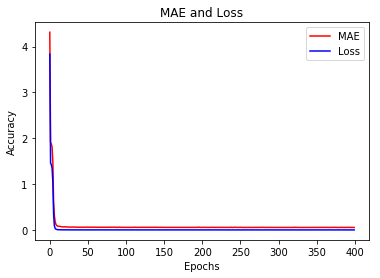

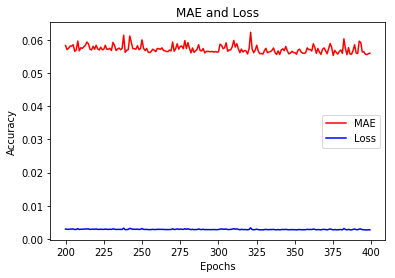

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

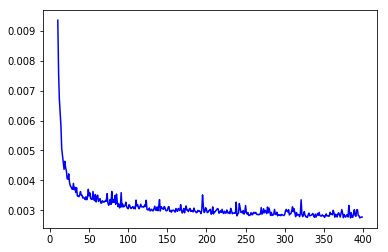

In [9]:
# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

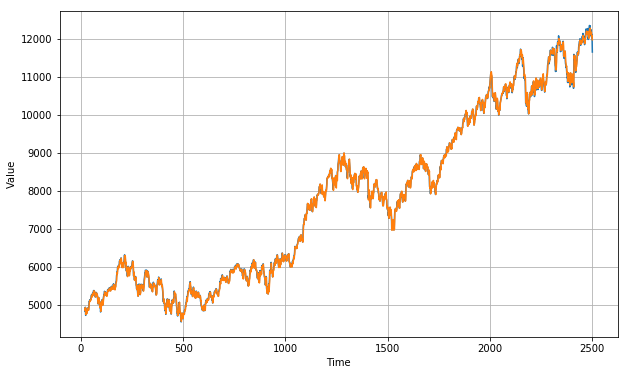

In [10]:
#Plotting training data and predictions

forecast = []
for time in range(len(nifty_train) - window_size):
    forecast.append(model.predict(nifty_train[time:time + window_size][np.newaxis]))

results = np.array(forecast)[:, 0, 0]*nifty_range

plt.figure(figsize=(10, 6))

plot_series(time_array[window_size:],nifty_raw[window_size:])
plot_series(time_array[window_size:], results)

In [11]:
print(tf.keras.metrics.mean_squared_error(nifty_raw[window_size:], results).numpy())
print(tf.keras.metrics.mean_absolute_error(nifty_raw[window_size:], results).numpy())

5426.4414
55.06865


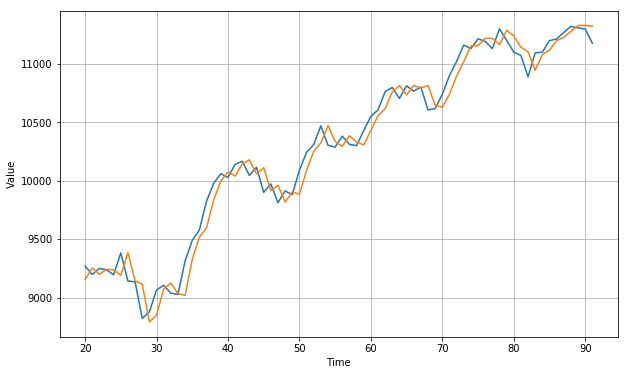

In [12]:
from nsepy import get_history

#Predictions on validation data
start_valid = datetime(2020,4,1)
end_valid = datetime.now()
nifty_raw_valid = np.array(get_history('NIFTY',start_valid,end_valid,index=True)['Close'])
nifty_valid = nifty_raw_valid/nifty_range
time_valid = np.arange(0,len(nifty_valid),1)

forecast = []
for time in range(len(nifty_valid) - window_size):
    forecast.append(model.predict(nifty_valid[time:time + window_size][np.newaxis]))

results = np.array(forecast)[:, 0, 0]*nifty_range


plt.figure(figsize=(10, 6))

plot_series(time_valid[window_size:],nifty_raw_valid[window_size:])
plot_series(time_valid[window_size:], results)

In [13]:
print(tf.keras.metrics.mean_squared_error(nifty_raw_valid[window_size:], results).numpy())
print(tf.keras.metrics.mean_absolute_error(nifty_raw_valid[window_size:], results).numpy())

14743.0625
98.92721


In [42]:
time = len(nifty_valid) - window_size
print("Tomorrow's Prediction :",model.predict(nifty_valid[time:time + window_size][np.newaxis])[0][0]*nifty_range)

Tomorrow's Prediction : 11227.164268493652


Predictions for next N days

In [51]:
N = 20
predictions = list(nifty_valid[-window_size:])

for i in range(N):
    predictions.append(model.predict(np.array(predictions[i:i+window_size])[np.newaxis])[0][0])
    
np.array(predictions[-N:])*nifty_range

array([11227.164, 11243.072, 11260.928, 11276.858, 11292.599, 11309.412,
       11325.588, 11341.726, 11357.564, 11373.226, 11388.65 , 11403.836,
       11418.774, 11433.451, 11447.856, 11461.986, 11475.828, 11489.38 ,
       11502.63 , 11515.576], dtype=float32)